In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
# STEP 1: Load and prepare the data
from google.colab import drive
drive.mount('/content/drive')

ld = pd.read_csv("/content/drive/My Drive/UCI_Credit_Card.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
ld.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [4]:
df = ld
df.describe()


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [5]:
print(df.shape)

(30000, 25)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [7]:
df.isnull().sum()

,0
ID,0
LIMIT_BAL,0
SEX,0
EDUCATION,0
MARRIAGE,0
AGE,0
PAY_0,0
PAY_2,0
PAY_3,0
PAY_4,0


In [8]:
df.drop(columns='ID', inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   30000 non-null  float64
 1   SEX                         30000 non-null  int64  
 2   EDUCATION                   30000 non-null  int64  
 3   MARRIAGE                    30000 non-null  int64  
 4   AGE                         30000 non-null  int64  
 5   PAY_0                       30000 non-null  int64  
 6   PAY_2                       30000 non-null  int64  
 7   PAY_3                       30000 non-null  int64  
 8   PAY_4                       30000 non-null  int64  
 9   PAY_5                       30000 non-null  int64  
 10  PAY_6                       30000 non-null  int64  
 11  BILL_AMT1                   30000 non-null  float64
 12  BILL_AMT2                   30000 non-null  float64
 13  BILL_AMT3                   300

In [10]:
print(df.duplicated().sum())

35


In [11]:
df.drop_duplicates()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,1,3,1,39,0,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,150000.0,1,3,2,43,-1,-1,-1,-1,0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,30000.0,1,2,2,37,4,3,2,-1,0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,80000.0,1,3,1,41,1,-1,0,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


<Axes: xlabel='default.payment.next.month', ylabel='count'>

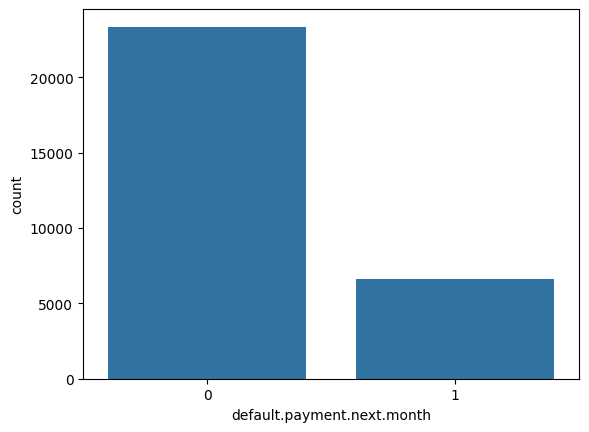

In [12]:
sns.countplot(data=df, x = 'default.payment.next.month')

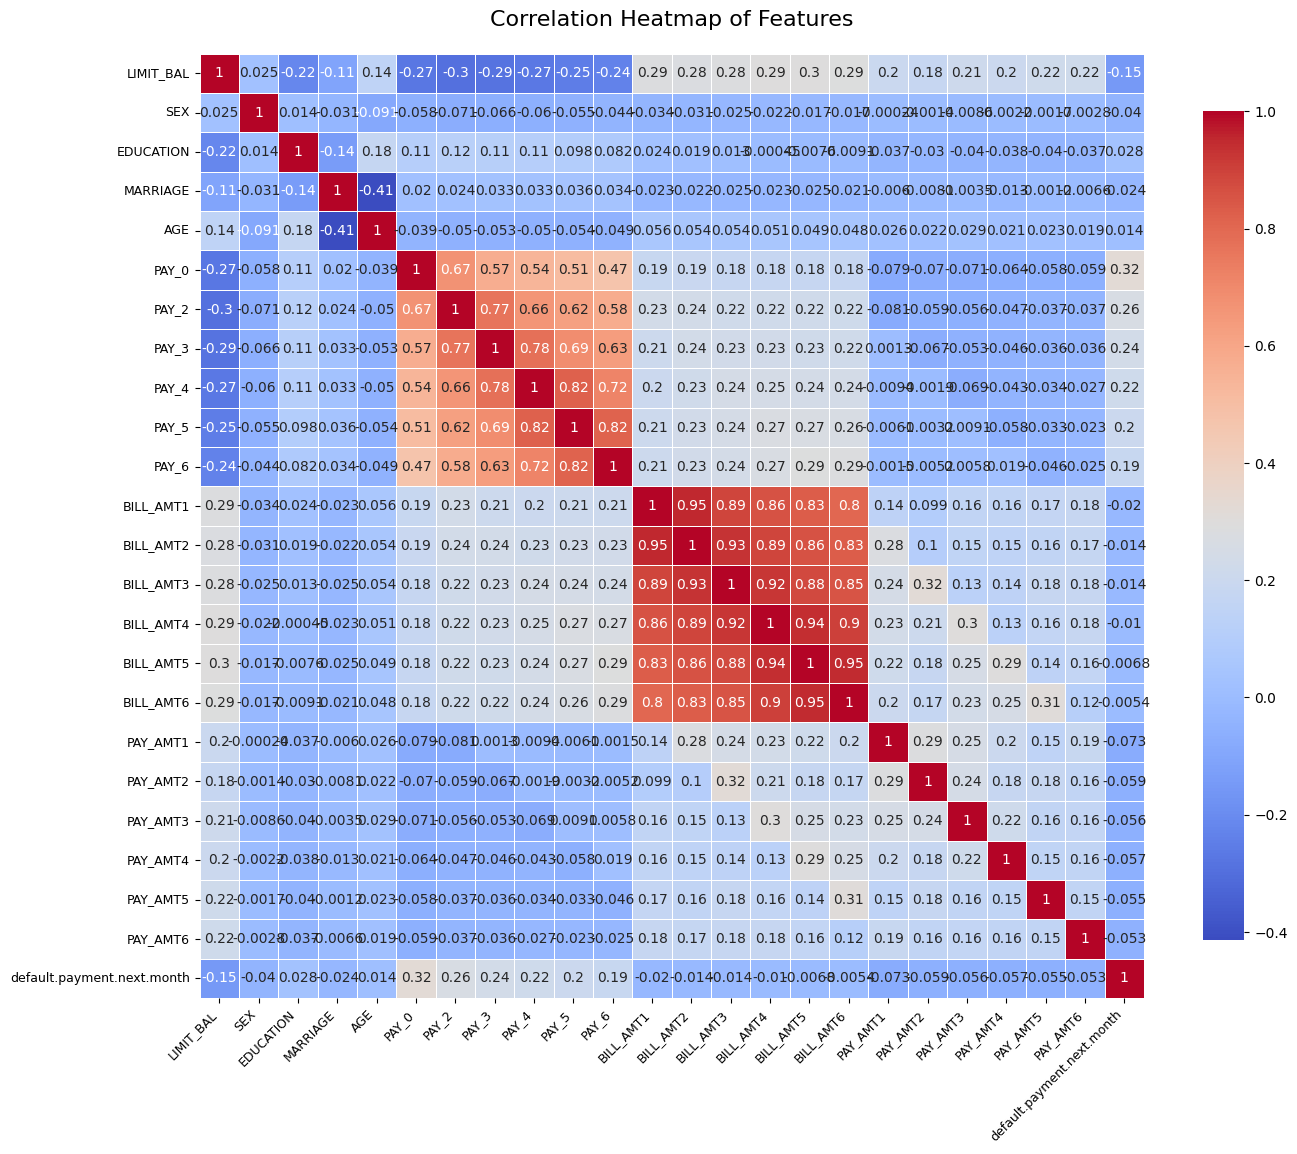

In [13]:
plt.figure(figsize=(14, 12))
corr = df.corr()
sns.heatmap(corr,
            annot=True,  # Turn on/off numbers
            cmap='coolwarm',
            square=True,
            linewidths=0.5,
            cbar_kws={'shrink': 0.8})
plt.title('Correlation Heatmap of Features', fontsize=16, pad=20)
plt.xticks(rotation=45, ha='right', fontsize=9)
plt.yticks(rotation=0, fontsize=9)
plt.tight_layout()
plt.show()

In [14]:
X = df.drop(columns='default.payment.next.month')
y = df['default.payment.next.month']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(24000, 23) (6000, 23)
(24000,) (6000,)


In [15]:
from sklearn.svm import SVC
class PSO:
    def __init__(self, n_particles=15, n_iterations=20, c1=2.0, c2=2.0, w=0.7):
        self.n_particles = n_particles
        self.n_iterations = n_iterations
        self.c1 = c1
        self.c2 = c2
        self.w = w

    def optimize(self, X_train, y_train, X_test, y_test):
        # Use subsets for faster training and evaluation during PSO
        X_train_subset = X_train[:10000]
        y_train_subset = y_train[:10000]
        X_test_subset = X_test[:3000]
        y_test_subset = y_test[:3000]
        print(f"Using {len(X_train_subset)} training and {len(X_test_subset)} test samples for PSO optimization")

        # Parameter bounds: [C, gamma]
        bounds = [(0.1, 1000), (0.0001, 1)]

        # Initialize particles
        particles = np.random.uniform([b[0] for b in bounds],
                                      [b[1] for b in bounds],
                                      (self.n_particles, 2))
        velocities = np.random.uniform(-1, 1, (self.n_particles, 2))

        # Evaluate initial positions
        fitness = np.array([self._evaluate(p, X_train_subset, y_train_subset, X_test_subset, y_test_subset)
                           for p in particles])

        pbest_positions = particles.copy()
        pbest_fitness = fitness.copy()

        gbest_idx = np.argmax(fitness)
        gbest_position = particles[gbest_idx].copy()
        gbest_fitness = fitness[gbest_idx]

        fitness_history = [gbest_fitness]

        # PSO iterations
        for iteration in range(self.n_iterations):
            for i in range(self.n_particles):
                r1, r2 = np.random.random(2)

                # Update velocity
                velocities[i] = (self.w * velocities[i] +
                                self.c1 * r1 * (pbest_positions[i] - particles[i]) +
                                self.c2 * r2 * (gbest_position - particles[i]))

                # Update position
                particles[i] += velocities[i]

                # Enforce bounds
                particles[i] = np.clip(particles[i],
                                      [b[0] for b in bounds],
                                      [b[1] for b in bounds])

                # Evaluate new position
                new_fitness = self._evaluate(particles[i], X_train_subset, y_train_subset, X_test_subset, y_test_subset)

                # Update personal best
                if new_fitness > pbest_fitness[i]:
                    pbest_fitness[i] = new_fitness
                    pbest_positions[i] = particles[i].copy()

                # Update global best
                if new_fitness > gbest_fitness:
                    gbest_fitness = new_fitness
                    gbest_position = particles[i].copy()

            fitness_history.append(gbest_fitness)
            print(f"Iteration {iteration + 1}/{self.n_iterations}, Best Accuracy: {gbest_fitness:.4f}, "
                  f"C: {gbest_position[0]:.4f}, Gamma: {gbest_position[1]:.6f}")

        return gbest_position, gbest_fitness, fitness_history

    def _evaluate(self, params, X_train, y_train, X_test, y_test):
        C, gamma = params
        try:
            svm = SVC(C=C, gamma=gamma, kernel='rbf', random_state=42)
            svm.fit(X_train, y_train)  # Already using subset passed from optimize
            accuracy = svm.score(X_test, y_test)
            return accuracy
        except:
            return 0.0

In [16]:
# STEP 3: Run PSO Optimization
# ============================================================================
# PSO Optimization
print("\nStarting PSO optimization...")
print("Training on first 10,000 samples for faster execution...")
pso = PSO(n_particles=15, n_iterations=10)
best_params, best_accuracy, fitness_history = pso.optimize(X_train, y_train, X_test, y_test)

print(f"\nOptimal Parameters - C: {best_params[0]:.4f}, Gamma: {best_params[1]:.6f}")
print(f"Best Accuracy: {best_accuracy:.4f}")


Starting PSO optimization...
Training on first 10,000 samples for faster execution...
Using 10000 training and 3000 test samples for PSO optimization
Iteration 1/10, Best Accuracy: 0.8187, C: 295.9838, Gamma: 0.002502
Iteration 2/10, Best Accuracy: 0.8187, C: 295.9838, Gamma: 0.002502
Iteration 3/10, Best Accuracy: 0.8187, C: 295.9838, Gamma: 0.002502
Iteration 4/10, Best Accuracy: 0.8187, C: 295.9838, Gamma: 0.002502
Iteration 5/10, Best Accuracy: 0.8187, C: 295.9838, Gamma: 0.002502
Iteration 6/10, Best Accuracy: 0.8187, C: 295.9838, Gamma: 0.002502
Iteration 7/10, Best Accuracy: 0.8187, C: 295.9838, Gamma: 0.002502
Iteration 8/10, Best Accuracy: 0.8187, C: 295.9838, Gamma: 0.002502
Iteration 9/10, Best Accuracy: 0.8187, C: 295.9838, Gamma: 0.002502
Iteration 10/10, Best Accuracy: 0.8187, C: 295.9838, Gamma: 0.002502

Optimal Parameters - C: 295.9838, Gamma: 0.002502
Best Accuracy: 0.8187


In [17]:
# STEP 4: Train final SVM with optimized parameters
# ============================================================================

print("\n" + "=" * 60)
print("FINAL SVM MODEL EVALUATION")
print("=" * 60 + "\n")

# Train optimized SVM
C_optimal, gamma_optimal = best_params
svm_optimized = SVC(C=C_optimal, gamma=gamma_optimal,class_weight='balanced', kernel='rbf', random_state=42)
svm_optimized.fit(X_train, y_train)
y_pred_optimized = svm_optimized.predict(X_test)

# Train baseline SVM for comparison
svm_baseline = SVC(class_weight='balanced', kernel='rbf', random_state=42)
svm_baseline.fit(X_train, y_train)
y_pred_baseline = svm_baseline.predict(X_test)

# Calculate metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

metrics_optimized = {
    'Accuracy': accuracy_score(y_test, y_pred_optimized),
    'Precision': precision_score(y_test, y_pred_optimized),
    'Recall': recall_score(y_test, y_pred_optimized),
    'F1-Score': f1_score(y_test, y_pred_optimized)
}

metrics_baseline = {
    'Accuracy': accuracy_score(y_test, y_pred_baseline),
    'Precision': precision_score(y_test, y_pred_baseline),
    'Recall': recall_score(y_test, y_pred_baseline),
    'F1-Score': f1_score(y_test, y_pred_baseline)
}

print("BASELINE SVM (Default Parameters):")
for metric, value in metrics_baseline.items():
    print(f"  {metric}: {value:.4f}")

print("\nOPTIMIZED SVM (PSO Parameters):")
for metric, value in metrics_optimized.items():
    print(f"  {metric}: {value:.4f}")

print(classification_report(y_test, y_pred_optimized))


FINAL SVM MODEL EVALUATION

BASELINE SVM (Default Parameters):
  Accuracy: 0.7737
  Precision: 0.4858
  Recall: 0.5864
  F1-Score: 0.5314

OPTIMIZED SVM (PSO Parameters):
  Accuracy: 0.7673
  Precision: 0.4745
  Recall: 0.5880
  F1-Score: 0.5252
              precision    recall  f1-score   support

           0       0.88      0.82      0.85      4687
           1       0.47      0.59      0.53      1313

    accuracy                           0.77      6000
   macro avg       0.68      0.70      0.69      6000
weighted avg       0.79      0.77      0.78      6000



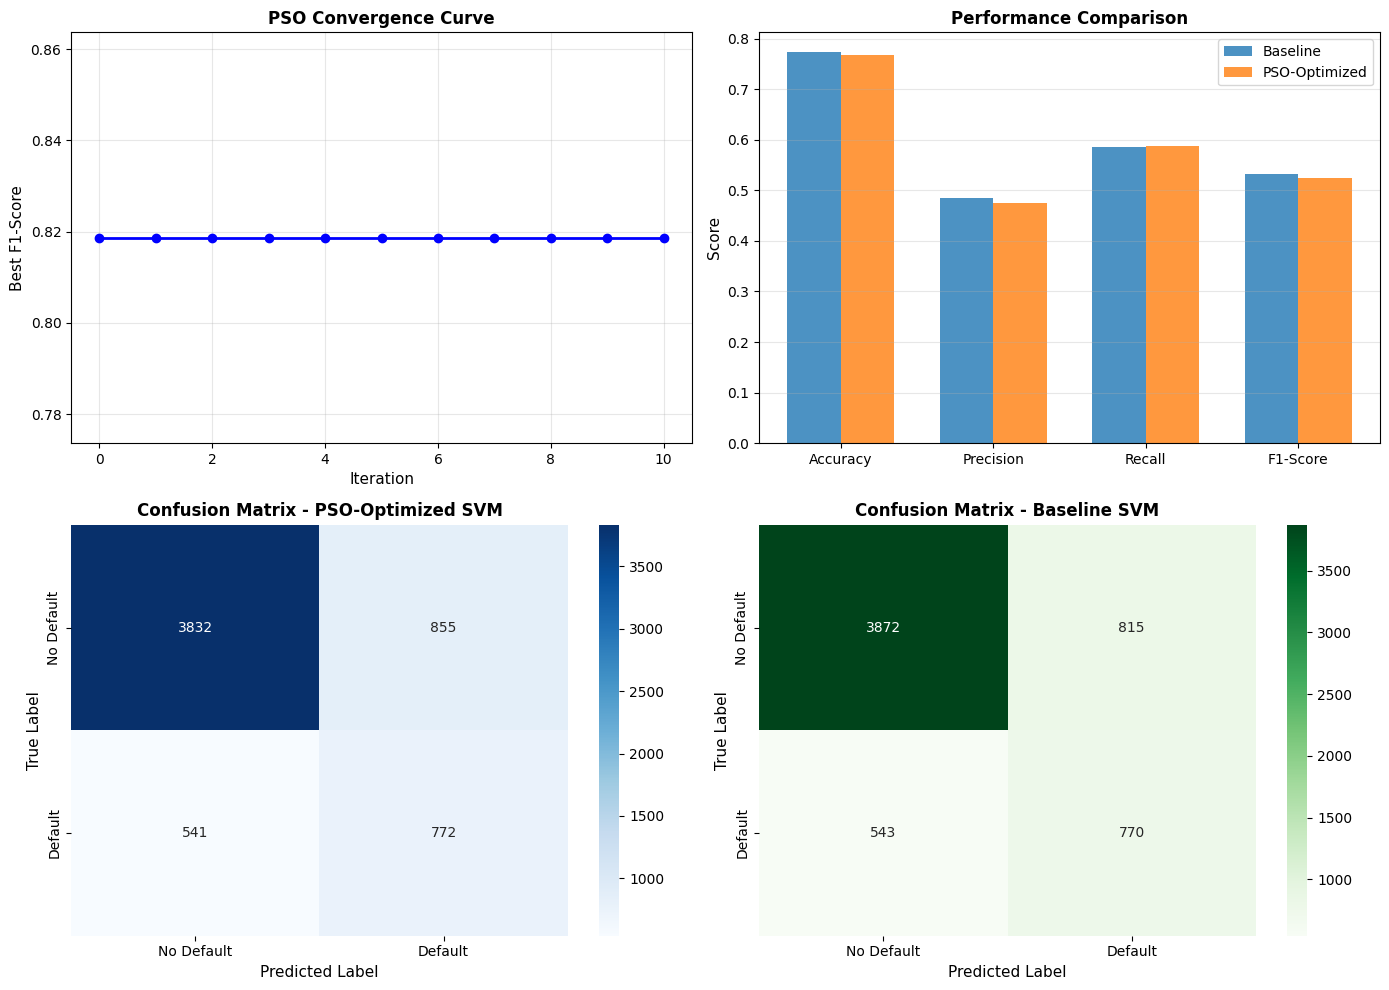

In [18]:
# STEP 5: Visualize Results
# ============================================================================

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: PSO Convergence
axes[0, 0].plot(fitness_history, 'b-', linewidth=2, marker='o')
axes[0, 0].set_xlabel('Iteration', fontsize=11)
axes[0, 0].set_ylabel('Best F1-Score', fontsize=11)
axes[0, 0].set_title('PSO Convergence Curve', fontsize=12, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Metrics Comparison
metrics_names = list(metrics_baseline.keys())
baseline_values = list(metrics_baseline.values())
optimized_values = list(metrics_optimized.values())

x = np.arange(len(metrics_names))
width = 0.35

axes[0, 1].bar(x - width/2, baseline_values, width, label='Baseline', alpha=0.8)
axes[0, 1].bar(x + width/2, optimized_values, width, label='PSO-Optimized', alpha=0.8)
axes[0, 1].set_ylabel('Score', fontsize=11)
axes[0, 1].set_title('Performance Comparison', fontsize=12, fontweight='bold')
axes[0, 1].set_xticks(x)
axes[0, 1].set_xticklabels(metrics_names)
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3, axis='y')

# Plot 3: Confusion Matrix - Optimized
cm_optimized = confusion_matrix(y_test, y_pred_optimized)
sns.heatmap(cm_optimized, annot=True, fmt='d', cmap='Blues', ax=axes[1, 0],
            xticklabels=['No Default', 'Default'], yticklabels=['No Default', 'Default'])
axes[1, 0].set_title('Confusion Matrix - PSO-Optimized SVM', fontsize=12, fontweight='bold')
axes[1, 0].set_ylabel('True Label', fontsize=11)
axes[1, 0].set_xlabel('Predicted Label', fontsize=11)

# Plot 4: Confusion Matrix - Baseline
cm_baseline = confusion_matrix(y_test, y_pred_baseline)
sns.heatmap(cm_baseline, annot=True, fmt='d', cmap='Greens', ax=axes[1, 1],
            xticklabels=['No Default', 'Default'], yticklabels=['No Default', 'Default'])
axes[1, 1].set_title('Confusion Matrix - Baseline SVM', fontsize=12, fontweight='bold')
axes[1, 1].set_ylabel('True Label', fontsize=11)
axes[1, 1].set_xlabel('Predicted Label', fontsize=11)

plt.tight_layout()
plt.savefig('/content/drive/My Drive/PSO_SVM_Results.png', dpi=300, bbox_inches='tight')
plt.show()